Simple example of using evolution strategies inside `es.py` for toy deterministic fitness function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import cma
from es import SimpleGA, CMAES, PEPG, OpenES

In [3]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

fit_func = rastrigin

In [4]:
NPARAMS = 100        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 4000 # run each solver for 5000 generations.

In [5]:
# defines a function to use solver to solve fit_func
def test_solver(solver):
  history = []
  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    fitness_list = np.zeros(solver.popsize)
    for i in range(solver.popsize):
      fitness_list[i] = fit_func(solutions[i])
    solver.tell(fitness_list)
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])
    if (j+1) % 100 == 0:
      print("fitness at iteration", (j+1), result[1])
  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history

In [6]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(rastrigin(x))

This is F(0):
-10000.0


In [7]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print(rastrigin(x))
print("global optimum point:\n", x)

-0.0
global optimum point:
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [8]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=0.5,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [9]:
ga_history = test_solver(ga)

fitness at iteration 100 -1270.9405459487725
fitness at iteration 200 -1112.97854938833
fitness at iteration 300 -1035.8973081134886
fitness at iteration 400 -1035.8973081134886
fitness at iteration 500 -960.5376169522381
fitness at iteration 600 -956.9113350231733
fitness at iteration 700 -902.2705233485054
fitness at iteration 800 -883.6005667048325
fitness at iteration 900 -808.7428524766719
fitness at iteration 1000 -742.7650739418032
fitness at iteration 1100 -722.0036718794033
fitness at iteration 1200 -704.9901952122016
fitness at iteration 1300 -656.9675862213519
fitness at iteration 1400 -565.129909830116
fitness at iteration 1500 -527.3428082061399
fitness at iteration 1600 -496.92931625904816
fitness at iteration 1700 -447.63253784993196
fitness at iteration 1800 -411.7816534849376
fitness at iteration 1900 -366.3581914879842
fitness at iteration 2000 -350.0064985518047
fitness at iteration 2100 -312.3407612269185
fitness at iteration 2200 -291.09869772801676
fitness at iter

In [9]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.5
          )

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=294764, Fri Oct 27 22:06:15 2017)


In [10]:
cma_history = test_solver(cmaes)

fitness at iteration 100 -1003.9909974159419
fitness at iteration 200 -802.8268305857051
fitness at iteration 300 -60.280708828513866
fitness at iteration 400 -53.73079723380158
fitness at iteration 500 -53.727776804587734
fitness at iteration 600 -53.72777397149821
fitness at iteration 700 -53.72777396958156
fitness at iteration 800 -53.72777396958077
fitness at iteration 900 -53.72777396958065
fitness at iteration 1000 -53.72777396958065
fitness at iteration 1100 -53.72777396958065
fitness at iteration 1200 -53.72777396958065
fitness at iteration 1300 -53.72777396958065
fitness at iteration 1400 -53.72777396958065
fitness at iteration 1500 -53.72777396958065
fitness at iteration 1600 -53.72777396958065
fitness at iteration 1700 -53.72777396958065
fitness at iteration 1800 -53.72777396958065
fitness at iteration 1900 -53.72777396958065
fitness at iteration 2000 -53.72777396958065
fitness at iteration 2100 -53.72777396958065
fitness at iteration 2200 -53.72777396958065
fitness at itera

In [10]:
# defines PEPG (NES) solver
pepg = PEPG(NPARAMS,                         # number of model parameters
            sigma_init=0.5,                  # initial standard deviation
            learning_rate=0.1,               # learning rate for standard deviation
            learning_rate_decay=1.0,       # don't anneal the learning rate
            popsize=NPOPULATION,             # population size
            average_baseline=False,          # set baseline to average of batch
            weight_decay=0.00,            # weight decay coefficient
            rank_fitness=False,           # use rank rather than fitness numbers
            forget_best=False)            # don't keep the historical best solution)

In [11]:
pepg_history = test_solver(pepg)

fitness at iteration 100 -3709.272096057294
fitness at iteration 200 -1365.415772113699
fitness at iteration 300 -1027.0212355244419
fitness at iteration 400 -878.7561447943988
fitness at iteration 500 -671.5197432670567
fitness at iteration 600 -579.3979577037712
fitness at iteration 700 -489.6805220486888
fitness at iteration 800 -433.55793720126167
fitness at iteration 900 -388.43962150330617
fitness at iteration 1000 -357.3195625037024
fitness at iteration 1100 -309.98571154033175
fitness at iteration 1200 -283.84752615648097
fitness at iteration 1300 -263.6379299517439
fitness at iteration 1400 -256.2636782420475
fitness at iteration 1500 -252.64177386433823
fitness at iteration 1600 -251.5866428546716
fitness at iteration 1700 -245.27256337363906
fitness at iteration 1800 -244.29971815291026
fitness at iteration 1900 -242.93534684685415
fitness at iteration 2000 -242.8903295415214
fitness at iteration 2100 -241.6873278759307
fitness at iteration 2200 -241.58048075398062
fitness a

In [12]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=0.5,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [13]:
oes_history = test_solver(oes)

fitness at iteration 100 -2541.904434811829
fitness at iteration 200 -839.7021630443957
fitness at iteration 300 -806.316819581016
fitness at iteration 400 -806.316819581016
fitness at iteration 500 -800.9053909182181
fitness at iteration 600 -747.6623224719814
fitness at iteration 700 -662.4270293720813
fitness at iteration 800 -579.5092657046469
fitness at iteration 900 -560.779734578466
fitness at iteration 1000 -510.3039990127679
fitness at iteration 1100 -462.37547866537204
fitness at iteration 1200 -374.03180995809635
fitness at iteration 1300 -344.5584479822553
fitness at iteration 1400 -318.66223473501634
fitness at iteration 1500 -318.66223473501634
fitness at iteration 1600 -284.42665511046414
fitness at iteration 1700 -263.5232392501059
fitness at iteration 1800 -221.5937381543464
fitness at iteration 1900 -211.52921333848008
fitness at iteration 2000 -189.59453169590313
fitness at iteration 2100 -179.9536190002949
fitness at iteration 2200 -177.45391109281832
fitness at ite

In [14]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
# this version turns on antithetic sampling. It doesn't really help, and sometimes hurts performance.
oes_antithetic = OpenES(NPARAMS,            # number of model parameters
                 sigma_init=0.5,            # initial standard deviation
                 sigma_decay=0.999,         # don't anneal standard deviation
                 learning_rate=0.1,         # learning rate for standard deviation
                 learning_rate_decay=1.0,   # annealing the learning rate
                 popsize=NPOPULATION+1,     # population size
                 antithetic=True,           # whether to use antithetic sampling
                 weight_decay=0.00,         # weight decay coefficient
                 rank_fitness=False,        # use rank rather than fitness numbers
                 forget_best=False)

In [15]:
oes_antithetic_history = test_solver(oes_antithetic)

fitness at iteration 100 -3203.600664147284
fitness at iteration 200 -899.2101396734763
fitness at iteration 300 -798.3906657449379
fitness at iteration 400 -798.3906657449379
fitness at iteration 500 -798.3906657449379
fitness at iteration 600 -746.7011942314931
fitness at iteration 700 -681.8959040450345
fitness at iteration 800 -628.8655271832366
fitness at iteration 900 -533.4071308109761
fitness at iteration 1000 -489.563987978847
fitness at iteration 1100 -425.283111177289
fitness at iteration 1200 -397.931602517962
fitness at iteration 1300 -385.68662080399395
fitness at iteration 1400 -337.8262995786091
fitness at iteration 1500 -324.04015683236696
fitness at iteration 1600 -313.6236640690281
fitness at iteration 1700 -297.597392831363
fitness at iteration 1800 -269.09411907286005
fitness at iteration 1900 -249.4256448508453
fitness at iteration 2000 -232.41644487730912
fitness at iteration 2100 -229.1934605288185
fitness at iteration 2200 -223.4266192649576
fitness at iteratio

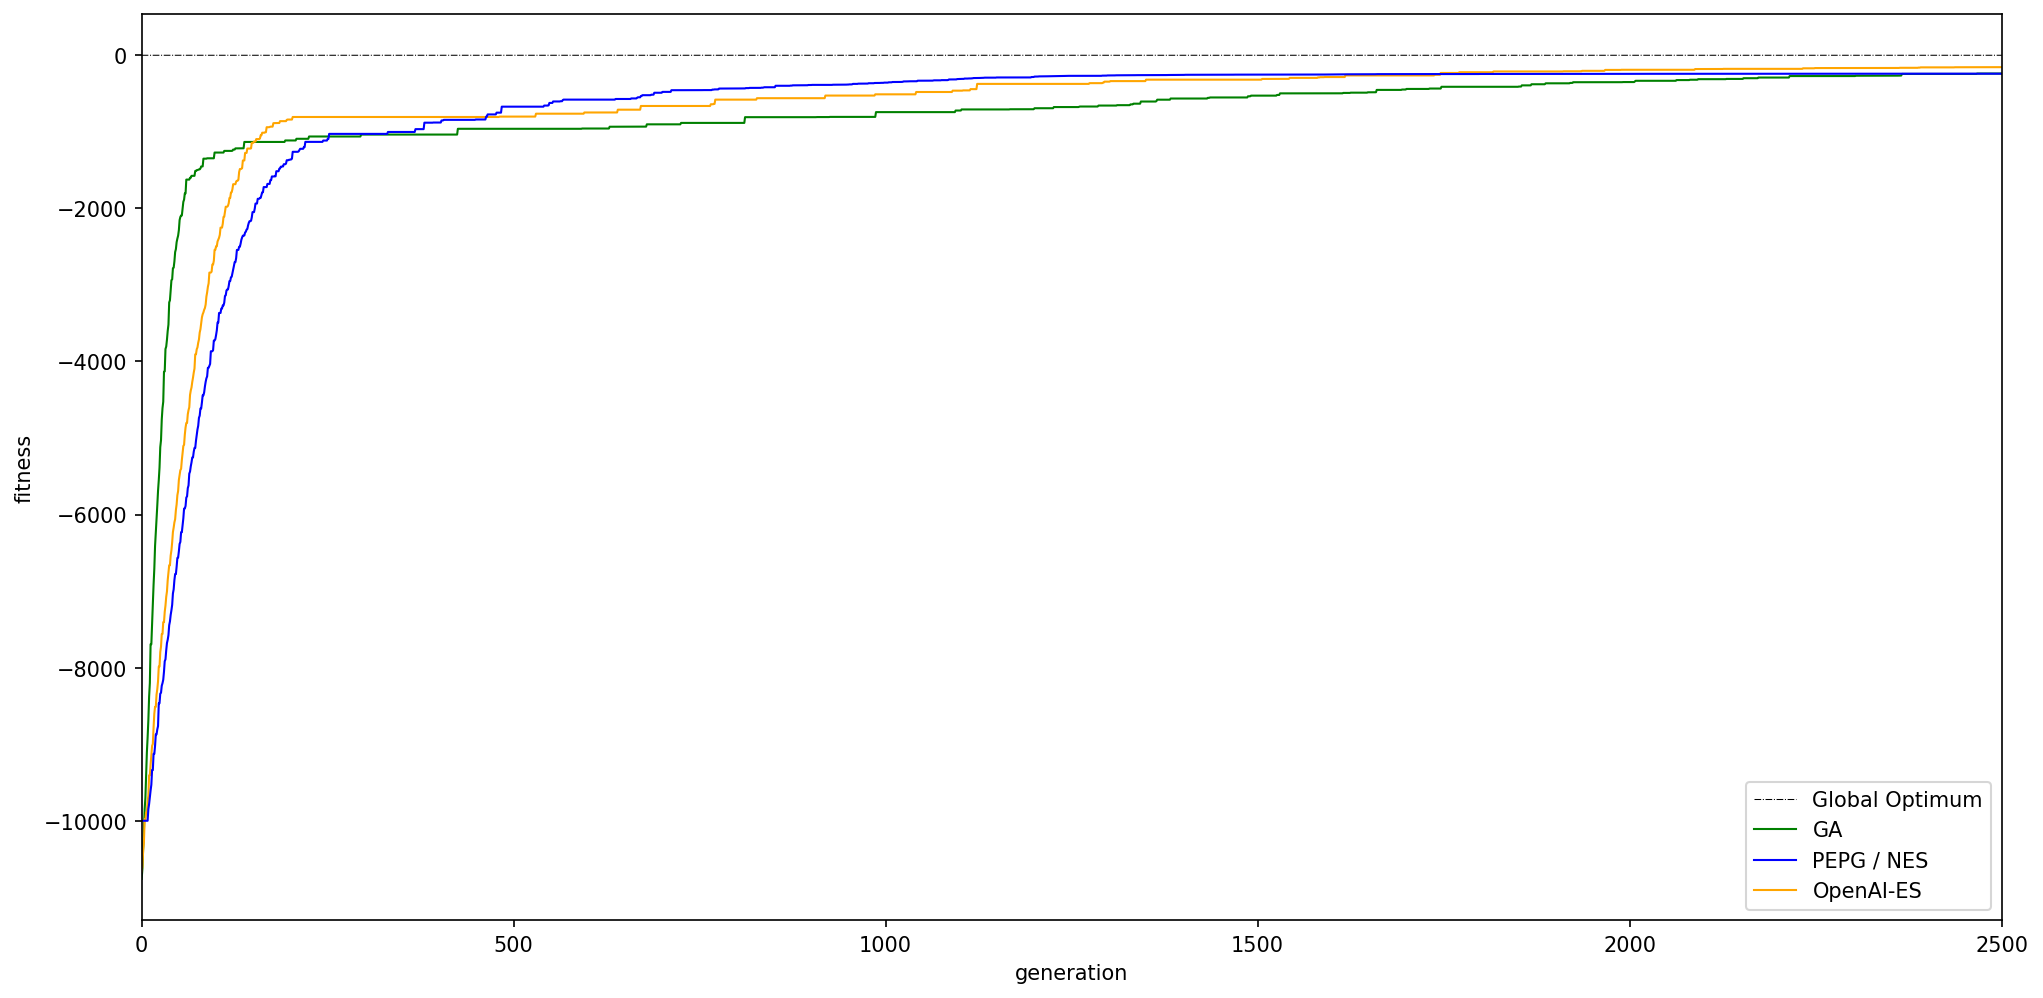

In [17]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(16,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
pepg_line, = plt.plot(pepg_history, color="blue", linewidth=1.0, linestyle="-", label='PEPG / NES')
# cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')

# plt.legend(handles=[optimum_line, ga_line, cma_line, pepg_line, oes_line], loc=4)
plt.legend(handles=[optimum_line, ga_line, pepg_line, oes_line], loc=4)

# Set x limits
plt.xlim(0,2500)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()